In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [7]:
# generate random data first
#y is array to define each group
x,_=make_blobs(n_samples=1000,n_features=2,random_state=42)

<Axes: >

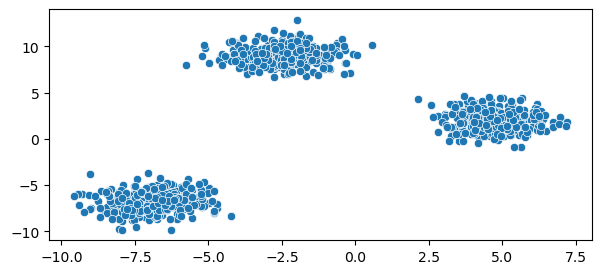

In [8]:
plt.figure(figsize=(7,3))
sns.scatterplot(x=x[:,0],y=x[:,1])

In [10]:
km=KMeans(n_clusters=3,init='k-means++',n_init=4,max_iter=20,random_state=42)
km.fit(x)

KMeans(max_iter=20, n_clusters=3, n_init=4, random_state=42)

In [12]:
labels=km.labels_

In [14]:
df=pd.DataFrame(x,columns=['x1','x2'])
df.head()

,x1,x2
0,-6.596339,-7.139015
1,-6.137532,-6.580817
2,5.198206,2.049175
3,-2.968559,8.164442
4,-2.768789,7.511143


In [15]:
df['label']=labels

In [16]:
df.head()

,x1,x2,label
0,-6.596339,-7.139015,0
1,-6.137532,-6.580817,0
2,5.198206,2.049175,1
3,-2.968559,8.164442,2
4,-2.768789,7.511143,2


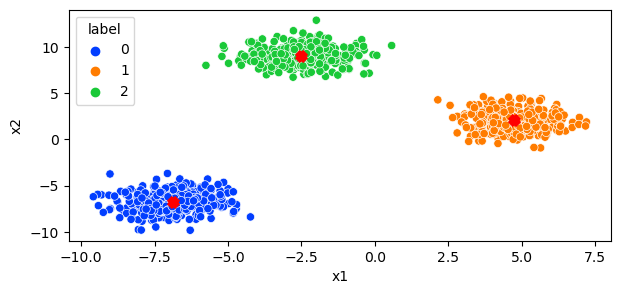

In [29]:
# palette is done using research
plt.figure(figsize=(7,3))
sns.scatterplot(data=df,x='x1',y='x2',hue='label',palette='bright')
plt.scatter(x=centers[:,0],y=centers[:,1],marker='x',color='red',linewidths=5)

In [19]:
centers=km.cluster_centers_

In [32]:
# after that we can seperate our data according to the labels and doing our analysis
cluster_0=df[df['label']==0]

# ELBOW METHOD

In [37]:
def elbow_method(data):
    inertia=[]
    k=range(1,11)
    for i in k:
        model=KMeans(n_clusters=i)
        model.fit(data)
        inertia.append(model.inertia_)
    plt.figure(figsize=(7,5))
    plt.plot(k,inertia,color='red',marker='x')
    plt.title('select n_cluster')
    plt.xlabel('n_cluster')
    plt.ylabel('inertia')
    plt.show()
    
        

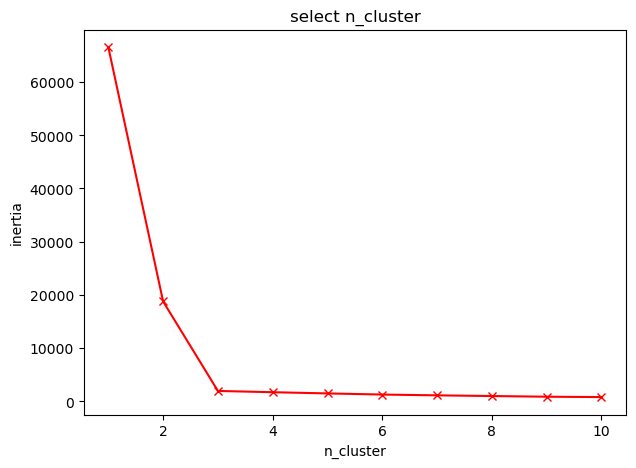

In [38]:
elbow_method(x)